<a href="https://colab.research.google.com/github/GabrielBora/GabrielBora/blob/main/Unicorns%20sep%202022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
Data_Base = pd.read_csv('unicorns till sep 2022.csv')
Data_Base.shape

#Import data base + lines/columns

(1186, 7)

In [78]:
Data_Base.rename( columns={
    'Valuation($B)' : 'Valuation ($)'
}, inplace=True )

In [77]:
Data_Base.head()

,Company,Valuation,Date Joined,Country,City,Industry,Investors,Month,Year
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [79]:
Data_Base.columns

Index(['Company', 'Valuation', 'Date Joined', 'Country', 'City ', 'Industry',
       'Investors', 'Month', 'Year'],
      dtype='object')

In [80]:
Data_Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Company      1186 non-null   object        
 1   Valuation    1186 non-null   object        
 2   Date Joined  1186 non-null   datetime64[ns]
 3   Country      1186 non-null   object        
 4   City         1186 non-null   object        
 5   Industry     1186 non-null   object        
 6   Investors    1168 non-null   object        
 7   Month        1186 non-null   int64         
 8   Year         1186 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 83.5+ KB


In [20]:
#checking null camps to see if it will interfere in the analysy
Data_Base.isnull().sum()

Company         0
Valuation       0
Date Joined     0
Country         0
City            0
Industry        0
Investors      18
dtype: int64

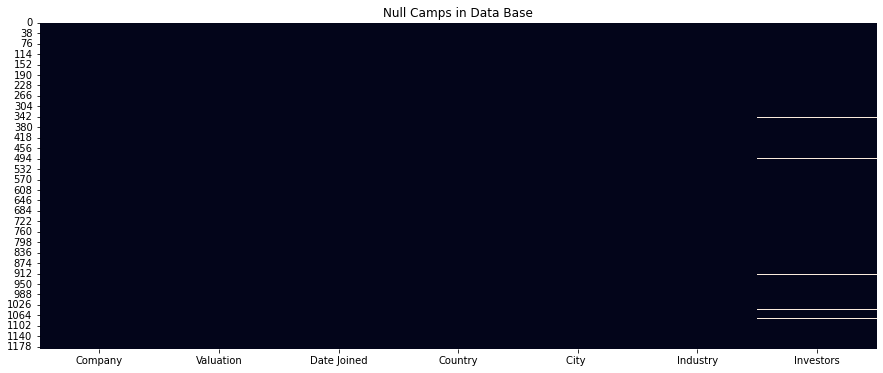

In [22]:
plt.figure(figsize=(15,6))
plt.title ('Null Camps in Data Base')
sns.heatmap( Data_Base.isnull(), cbar=False );

#Only few lines in the investidors column, no problem at all.

In [23]:
Data_Base.nunique()
#Unique infos

Company        1183
Valuation       222
Date Joined     695
Country          48
City            286
Industry         34
Investors      1152
dtype: int64

In [24]:
Data_Base['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [25]:
Data_Base['Industry'].value_counts()
#Rank

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [26]:
Data_Base['Industry'].value_counts(normalize=True)*100

#Rank in %

Fintech                                                               20.151771
Internet software & services                                          18.887015
E-commerce & direct-to-consumer                                        8.684654
Health                                                                 7.925801
Artificial intelligence                                                6.239460
Supply chain, logistics, & delivery                                    5.480607
Other                                                                  5.480607
Cybersecurity                                                          4.890388
Data management & analytics                                            3.794266
Auto & transportation                                                  3.372681
Hardware                                                               3.204047
Mobile & telecommunications                                            3.119730
Edtech                                  

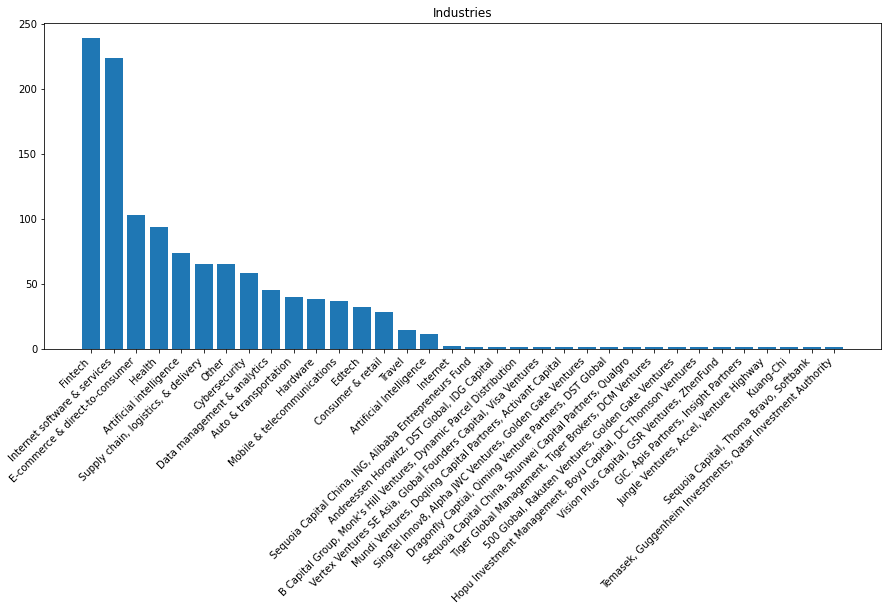

In [40]:
plt.figure(figsize=(15,6))
plt.title('Industries')
plt.bar(Data_Base['Industry'].value_counts().index, Data_Base['Industry'].value_counts())
plt.xticks(rotation=45, ha='right');



In [42]:
Analy = round( Data_Base['Country'].value_counts( normalize=True ) * 100, 1 )

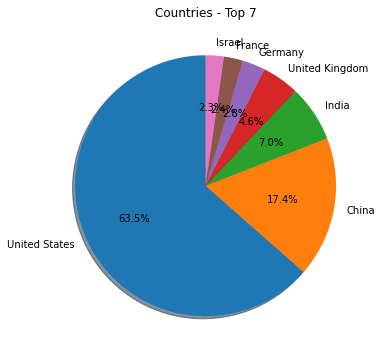

In [43]:
plt.figure( figsize=(15,6) )
plt.title('Countries - Top 7')
plt.pie(
    Analy.head(7),
    labels = Analy.index[0:7],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);
# I made it top 7 bc if I do not we will not can read the lot of names stacked // I want to find another graphic form in matplotlib that matchs better than this one to show countrys

In [37]:
Data_Base['Date Joined'] = pd.to_datetime( Data_Base['Date Joined'])
Data_Base['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [39]:
Data_Base['Month'] = pd.DatetimeIndex( Data_Base['Date Joined']).month
Data_Base['Year'] = pd.DatetimeIndex( Data_Base['Date Joined']).year
Data_Base.head()

#Increasing month and year 

,Company,Valuation,Date Joined,Country,City,Industry,Investors,Month,Year
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [54]:
Analysys = Data_Base.groupby( by=['Country', 'Year', 'Month', 'Company'] ).count()['Industry'].reset_index()
Analysys
# don't know how to fix industry column. I don't have an 'ID' column in the database so I can't show in place of industry

,Country,Year,Month,Company,Industry
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1
1183,United States,2022,8,Orna Therapeutics,1
1184,Vietnam,2021,10,Sky Mavis,1


In [70]:
Analysys.loc[
    Analysys['Country'] == 'Brazil']

,Country,Year,Month,Company,Industry
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1
